<a href="https://colab.research.google.com/github/NunezKant/JHU_OptimizationClass/blob/main/Optimization_Probabilistic_Machine_Learning_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from torch import nn
from torch.functional import F
from copy import copy
import seaborn as sns
from math import sin
from math import pi
from IPython.display import YouTubeVideo
sns.set_style("whitegrid")
sns.set_context("poster")

# 8.1 - An introduction to optimization
### Probabilistic Machine Learning Course  
### Janelia Research Campus / JHU 
##### Miguel Nuñez  
---

Training a machine learning model often boils down to finding a **good** set of parameters i.e, is a **parameter estimation** problem.

The notion of **“good”** is determined by the objective function or the probabilistic model.

<h4><center>But what is a objective/loss/cost function❓</center></h4>

> function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event

$$
L: \Theta ↦ ℝ
$$


Given this definition is intuitive to think that the goal is to minimize that cost.

That defines an **optimization problem** (Eq.1)

$$
\theta^* \in \underset{\theta \in \Theta}{argmin}(L(\theta))
$$

We will assume that the parameter space is given by $\Theta ⊆ ℝ^{D}$ where D is the number of variables being optimized over, thus we are focusing on **continuous optimization**

---

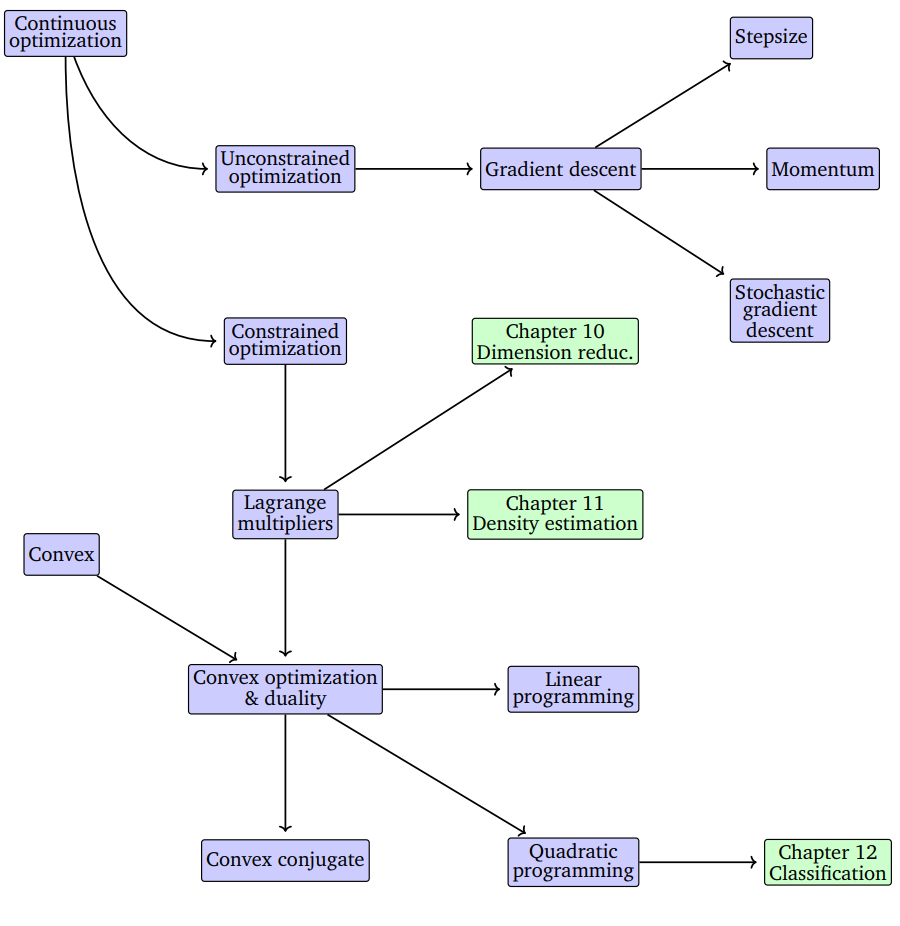

[Mathematics for ML book](https://mml-book.github.io/book/mml-book.pdf)

# 8.1.1 Local versus global optimization

A point that satisfies Equation 1 is called a **global optimum**, finding such a point is called **global optimization**, but in general, finding global optima is computationally intractable. 

The alternative: try to find a **local optimum**.  

> a point $\theta^*$ which has lower (or equal) cost than “nearby” points

A local minimum could be surrounded by other local minima with the same objective value; this is known as a **flat local minimum** or **saddle**.

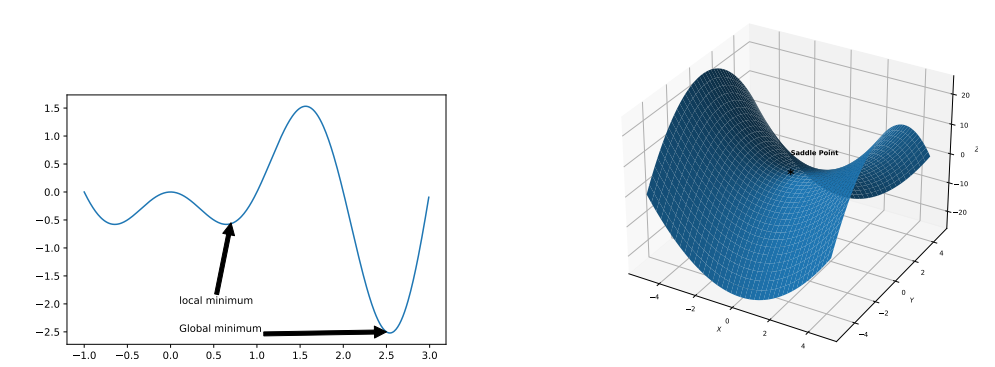

---

**Interesting point:**
🤔 if an algorithm is guaranteed to converge to a stationary point
from any starting point, it is called *globally convergent*.

However, this doesn't mean that it will converge to a global optimum; instead, it just means it will converge to some stationary point 😖. 

## 8.1.1.1 Optimality conditions for local vs global optima

For continous, twice differentiable functions, we can characterize local minima in the following way:



1.   $g(θ) = ∇L(θ)$ be the gradient vector
2.   $H(θ) = ∇^2L(θ)$ be the hessian matrix

And consider a point $θ^* \in ℝ^D$ and $g^*$ and $H^*$ the gradient and Hessian at that point, is a local minimium if:

*   Necessary condition:
  * we must have $g^* = 0$ and $H^{*}$ must be **positive semi-definite**
*   Sufficient condition: 
  * we must have $g^* = 0$ and $H^{*}$ must be **positive definite**

**Linear algebra refresher:**

A matrix is positive semi-definite if all its eigenvalues are $\lambda≥0$

--- 

*Observations:*

* First condition is necessary, but we cannot tell if we are in a local minimum, maximum or saddle point, precisely in a saddle point, some of the eigenvalues of $H^{*}$ might point uphill and others being flat.

* In contrast, $H^{*}$ being **positive definite** implies all directions pointing uphil.

In [ ]:
A = make_spd_matrix(4, random_state=123)
print(A)
np.all(np.linalg.eigvals(A) >= 0)

[[ 0.47243659  0.36201499  0.23624413 -0.20756552]
 [ 0.36201499  3.26723888  1.70966795 -0.39838002]
 [ 0.23624413  1.70966795  1.32704651 -0.17893753]
 [-0.20756552 -0.39838002 -0.17893753  0.35460046]]


True

# 8.1.2 Constrained vs unconstrained optimization (more definitions 😩)

* **unconstrained optimization**: the optimization task is finding any value in the parameter space Θ that minimizes the loss

* **constrained optimization**: we have a defined set of constraints (inequality or equality), on the parameter space, being the **feasible set**  (𝓒) the subset of the parameter space that satisfies the constraints such that:

$$
\theta^* \in \underset{\theta \in 𝓒}{argmin}(L(\theta))
$$

if 𝓒 = $R^D$ we go back to unconstrained optimization.



# 8.1.3 Convex optimization (even more more definitions 😩😩)

We require the objective to be a convex function defined over a convex
set (we define these terms below). 

In such problems, **every local minimum is also a global minimum**.

Thus many models are designed so that their training objectives are convex.

$𝑆$ is a **Convex set** if for any $x$, $x^{'} \in 𝑆$, we have:  

$$λx + (1- λ)x^{'} \in 𝑆, ∀  λ \in [0,1]$$

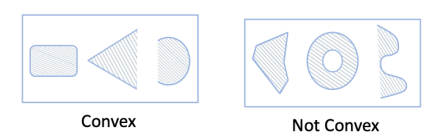

Similarly we have a convex function if the set of points above the function (epigraph) define a convex set and if:

for any $x,y \in 𝑆$ we have:

$$ f(λx + (1- λ)y) ≤  λf(x) + (1- λ)f(y) $$

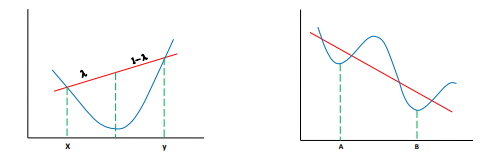

# 8.2 First order methods

In this section, we consider iterative optimization methods that leverage first-order derivatives of the objective function, i.e., they compute which directions point “downhill”, but they ignore curvature information.

All these algorithms require that the user specify a starting point $\theta_{0}$ then after each iteration ($t$) they perform an update of the form:

$$ \theta_{t+1} = \theta_{t} + \eta_{t}d_{t} $$

$\eta_{t}$ being the learning rate or step size 

$d_{t}$ being the descent direction, such as the negative of the gradient.


## 8.2.1 Gradient descent and step size

In [ ]:
def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-06):
    vector = []
    vector.append(start)
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector[i])
        if np.all(np.abs(diff) <= tolerance):
            break
        current_val = vector[i] + diff
        vector.append(current_val)
    return vector

In this toy example we will find the minimum of $x^2$ by **gradient descent**.

In [ ]:
values = np.arange(-10,11)
quad_func = lambda x: x ** 2
squares = np.array([quad_func(value) for value in values])

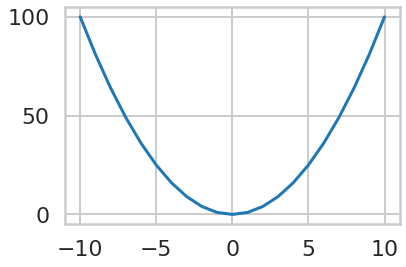

In [ ]:
plt.plot(values,squares)

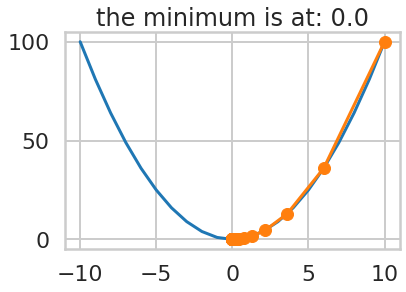

In [ ]:
θ = gradient_descent(gradient=lambda x: 2 * x, start=10.0, learn_rate=0.2)
plt.plot(values,squares)
descent_vals = np.array([quad_func(value) for value in θ])
plt.plot(θ,descent_vals,"-o");
plt.title(f"the minimum is at: {np.round(θ[-1],2)}");

What is the impact of the step size? 

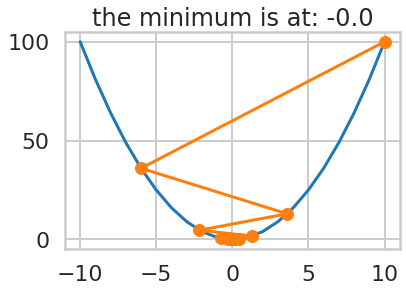

In [ ]:
θ = gradient_descent(gradient=lambda x: 2 * x, start=10.0, learn_rate=0.8)
plt.plot(values,squares)
descent_vals = np.array([quad_func(value) for value in θ])
plt.plot(θ,descent_vals,"-o");
plt.title(f"the minimum is at: {np.round(θ[-1],2)}");



> **Even when we arrived to the same solution, the behavior is completely different, this is specially important with non strictly convex functions**







### 8.2.1.1 Pytorch as a general optimization framework

we want to fit a regression line to the following function + noise:

$$a = 0.7, k = .01, b =0.2$$
$$a*e^{-k*x}+b$$

so the task is to recover $a, k, b$

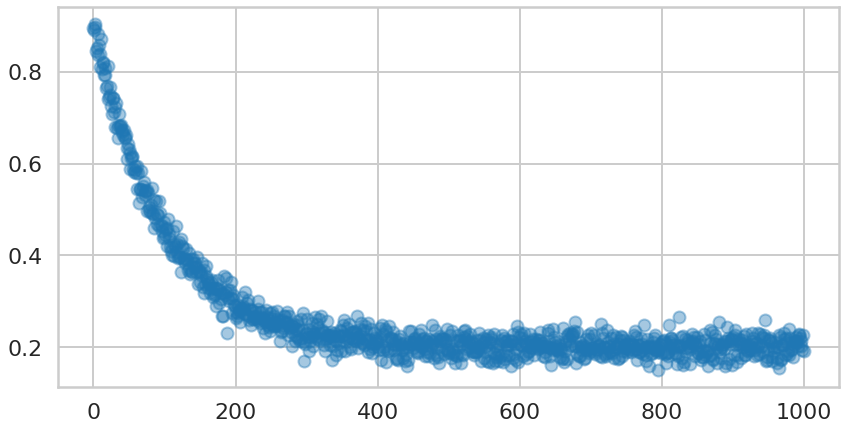

In [ ]:
n = 1000
noise = torch.Tensor(np.random.normal(0, 0.02, size=n))
x = torch.arange(n)
a, k, b = 0.7, .01, 0.2
y = a * np.exp(-k * x) + b + noise
plt.figure(figsize=(14, 7))
plt.scatter(x, y, alpha=0.4)

we can use Pytorch as general optimization framework if we manually register the *weights* (parameters) as torch parameters

In [ ]:
class Model(nn.Module):
    """Custom Pytorch model for gradient optimization.
    """
    def __init__(self):
        
        super().__init__()
        # initialize weights with random numbers
        weights = torch.distributions.Uniform(0, 0.1).sample((3,))
        ##### Make weights torch parameters !!!!!!#####
        self.weights = nn.Parameter(weights)        
        
    def forward(self, X):
        """Implement function to be optimised. In this case, an exponential decay
        function (a + exp(-k * X) + b),
        """
        a, k, b = self.weights
        return a * torch.exp(-k * X) + b
    
def training_loop(model, optimizer, n=4000):
    "Training loop for torch model."
    losses = []
    for i in range(n):
        preds = model(x)
        loss = F.mse_loss(preds, y).sqrt()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.detach().numpy())  
    return np.array(losses).reshape(-1)

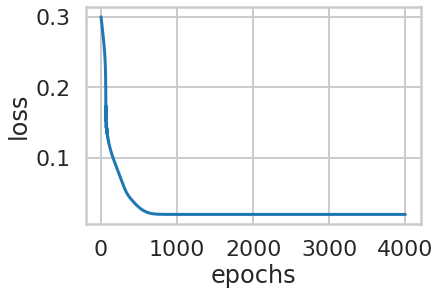

In [ ]:
m = Model()
# Instantiate optimizer
opt = torch.optim.Adam(m.parameters(), lr=0.001) # try changing the optimizer to other like ADAM, you can play with the iter number and the learning rate :) 
losses = training_loop(m, opt)
# Recover the parameters
a = np.round(m.weights[0].detach().numpy().item(),2)
k = np.round(m.weights[1].detach().numpy().item(),2)
b = np.round(m.weights[2].detach().numpy().item(),2)
plt.plot(losses)
plt.ylabel("loss")
plt.xlabel("epochs");

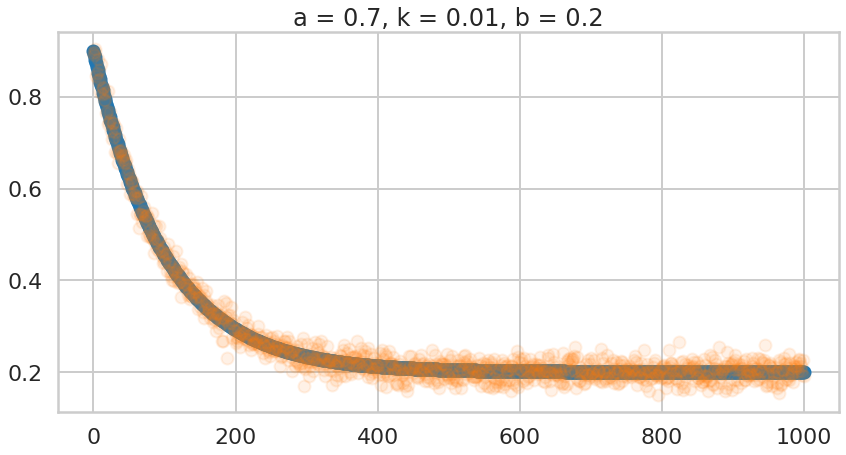

In [ ]:
preds = m(x)
plt.figure(figsize=(14, 7))
plt.scatter(x, preds.detach().numpy())
plt.scatter(x, y, alpha=.1)
plt.title(f"a = {a}, k = {k}, b = {b}");

**Key takeway: you can use pytorch as a general optimization tool, not only for ANNS** 🙌

[ref](https://https://towardsdatascience.com/how-to-use-pytorch-as-a-general-optimizer-a91cbf72a7fb)

## 8.2.2 Step size and line search

Step length η selection is important, and choosing the wrong one can make our algorithm slow or diverge.

Can we search for the optimum η for each step direction?

This becomes:

$$\eta_t = \underset{\eta >0}{argmin}L(θ_{t}+ηd_t)$$

This is a 1d minimization problem called **line search**, since we are searching along the line defined by $d_t$

Finding the optimal step size is known as **exact line search** , but we are not required to be so precise, so we can look for reduce the objective function without spending too much time trying to solve the equation above.



### 8.2.2.1 Armijo backtracking method

We start with some step size value, and reduce it by a factor of $0< \beta < 1$ at each step until we satisfy the following condition:

$$L(θ_{t}+ηd_t)≤L(\theta_t)+c\eta d^T_{t}\nabla L(\theta_t)$$

where $c \in [0,1]$ is a constast, with a tipically value of $10^{-4}$ 

Lets try a toy example with $x^2$ as a function: 

In [ ]:
quad_func = lambda x: x ** 2
gradient = lambda x: 2*x
η=1 
θ=600 
β=0.707
def ArmijoLineSearch(f,gradient,c,η,θ,β): 
  rates_list = []
  lefside = f(θ-η*gradient(θ))
  rightside = f(θ)-(c*η*np.dot(gradient(θ),gradient(θ)))
  while not lefside <= rightside:
    η=η*β
    rates_list.append(η)
    lefside = f(θ-rates_list[-1]*gradient(θ))
    rightside = f(θ)-(c*rates_list[-1]*np.dot(gradient(θ),gradient(θ)))
  return np.array(rates_list)

In [ ]:
rates = ArmijoLineSearch(quad_func,gradient,c=0.5,η=1,θ=1000,β=0.9)
print(rates)

[0.9       0.81      0.729     0.6561    0.59049   0.531441  0.4782969]


n iter: 51


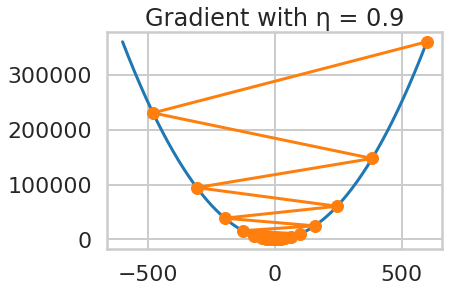

In [ ]:
θ = gradient_descent(gradient=lambda x: 2 * x, start=600, learn_rate=rates[0])
descent_vals = np.array([quad_func(value) for value in θ])
values = np.arange(-600,601)
squares = np.array([quad_func(value) for value in values])
plt.plot(values,squares)
plt.plot(θ,descent_vals,"-o");
plt.title(f"Gradient with η = {rates[0]}");
print(f"n iter: {len(descent_vals)}")

n iter: 8


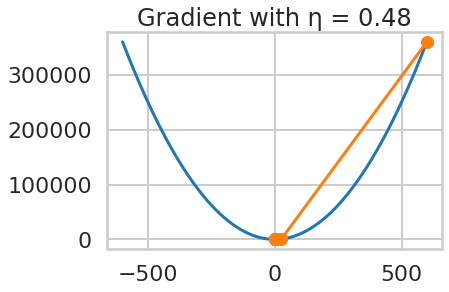

In [ ]:
θ = gradient_descent(gradient=lambda x: 2 * x, start=600, learn_rate=rates[-1])
descent_vals = np.array([quad_func(value) for value in θ])
values = np.arange(-600,601)
squares = np.array([quad_func(value) for value in values])
plt.plot(values,squares)
plt.plot(θ,descent_vals,"-o");
plt.title(f"Gradient with η = {np.round(rates[-1],2)}");
print(f"n iter: {len(descent_vals)}")

## 8.2.3 Momentum

> Move faster along directions that were previously good, and to slow down along directions where the gradient has suddenly changed, just like a ball rolling downhill

$$ m_{t} = \beta m_{t-1} + g_{t-1} $$
$$ \theta_{t} = \theta_{t-1} - \eta_{t}m_{t} $$

Where:

$m_t$ is the momentum and $0<\beta< 1 $

Commonly $\beta$ value is 0.9. for $\beta=0$ the method reduces to gradient descent.

The intuition behind is that we can se the **momentum as a exponentially weighted average of the past gradients**

$$m_{t} = \beta m_{t-1}+g_{t-1} = \beta^2 m_{t-2}+\beta g_{t-2}+g_{t-1}$$

# 8.3 Stochastic Gradient Descent

The word **stochastic** here refers to the fact that we acknowledge that we do not know the gradient precisely, but instead only know a noisy approximation to it, and this is still useful as long as it points in roughly the same direction as the true gradient. 

Often in Machine Learning, given $n=1,...,N$ data points, we often consider objective functions that are the sum of the losses $L_n$, incurred by each example $n$

$$ L(\theta) = \sum^N_{n=1}L_n(\theta) $$

One key thing is that we assume a way to compute an **unbiased estimate of the gradient**, if thats the case, this method will converge to a stationary point.



## 8.3.1 Standard Gradient Descent vs Stochastic Gradient Descent 

**Standard gradient descent** is a *“batch”* optimization method, i.e., optimization is performed using the full training set 

$$L(\theta) = \sum^N_{n=1}L_n(\theta)$$ 
using all $L_n(θ)$ for $n = 1, ... , N$

In contrast **stochastic gradient descent** is a *mini-batch* method, we randomly choose a subset of $L_n(θ)$  

### Large vs Small mini-batches

**Large mini-batch sizes**: will provide accurate estimates of the gradient, reducing the variance in the parameter update, the reduction in variance leads to more **stable convergence**, but each **gradient calculation will be more expensive**.


**Small mini-batches**: are quick to estimate and if we keep the
mini-batch size small, the noise in our gradient estimate **will allow us to
get out of some bad local optima**.

### Example: SDG fitting linear regression

$$L(θ) = \frac{1}{2N}\sum_{n=1}^N(x_n^T\theta -y_n)^2 = \frac{1}{2N}\parallel X\theta - y \parallel_2^2 $$ 

so the gradient is: $\frac{1}{N}\sum_{n=1}^N(\theta_t^Tx_n -y_n)x_n$

Now lets consider a mini-batch of 1; the update becomes:

$$\theta_{t+1} = \theta_t - \eta_t(\theta_t^Tx_n - y_n)x_n$$

where $n=n(t)$ is the index of the example chosen at iteration $t$ 

This is called Least Mean Squares.

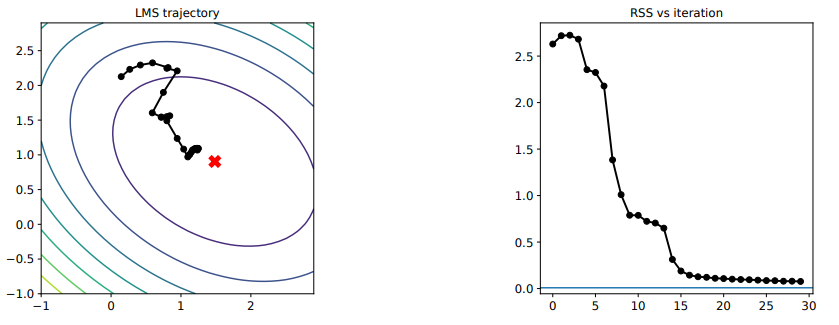

💡 **NOTE:** SDG (hence LMS) may require multiple passes through the data to find the optimum.


## 8.3.2 Adaptative Methods

This methods actively modify the learning rate, accelerating the optimization process or improving the capability of the optimization algorithm.



### 8.3.2.1 AdaGrad

A problem with the gradient descent algorithm is that the step size is the same for each variable or dimension in the search space. 

It is possible that better performance can be achieved using a step size that is tailored to each variable, *allowing larger movements in dimensions with a consistently steep gradient and smaller movements in dimensions with less steep gradients*.

> AdaGrad is designed to specifically explore the idea of automatically tailoring the step size for each dimension in the search space.

Previously, we performed an update for all parameters $θ$ at once as every parameter $θ_i$ used the same learning rate $η$

Now, the update has the following form:

$$\theta_{t+1,d}=\theta_{t,d}-\eta_t \frac{1}{\sqrt{s_{t,d}+ϵ}}g_{t,d}$$

where:

*   $d=1,...,D$ indexes the dimensions of the parameter vector
*   $s_{t,d} = \sum_{i=1}^t g_{i,d}^2$ (sum of squared gradients)
* $ϵ > 0 $ is a small number avoiding dividing by zero

💡 **NOTE:**  Adagrad's main weakness is its accumulation of the squared gradients in the denominator. This might cause the learning rate to shrink.



### 8.3.2.2 RMSProp and AdaDelta

#### RMSProp

AdaGrad main problem is that the term in the denominator gets larger over time, so the effective learning rate drops. 

An alternative is to use an **exponentially weighted moving average** (EWMA) of the
past squared gradients, rather than their sum:

$$s_{t+1,d} = \beta s_{t,d} + (1-\beta) g_{t,d}^2 $$

In practice we usually use $β ∼ 0.9$, which puts more weight on recent examples

We can write te update in vector form as follows:

$$Δ\theta_t = -\eta_t\frac{1}{\sqrt{s_t + ϵ}}g_t$$

where the square root and the division is performed elementwise, so we end with calculating the **root mean squared** of the average.

#### AdaDelta

In this method, in addition to accumulating an EWMA of gradients in $s$, it also keeps an EWMA of the updates $\delta_t$

$$\delta_{t} = \beta \delta_{t-1} + (1-\beta) (\Delta \theta_{t})^2 $$

having the following update: 

$$Δ\theta_t = -\eta_t\frac{\sqrt{\delta_{t-1} + ϵ}}{\sqrt{s_t + ϵ}}g_t$$

with this form, we basically multiply the rate by a scalar.


### 8.3.2.3 ADAM

RMSProp + momentum
$$m_{t} = \beta_1 m_{t-1} + (1-\beta_1) g_{t} $$
$$s_{t} = \beta_2 s_{t-1} + (1-\beta_2) g_{t}^2 $$

resulting in the following update:

$$Δ\theta_t = -\eta_t\frac{1}{\sqrt{s_t} + ϵ}m_t$$

This is known as the "**Adaptative moment method**" or ADAM.

if we initialize $m_0 = s_0 = 0$ then initial estimates will be biased towards small values.

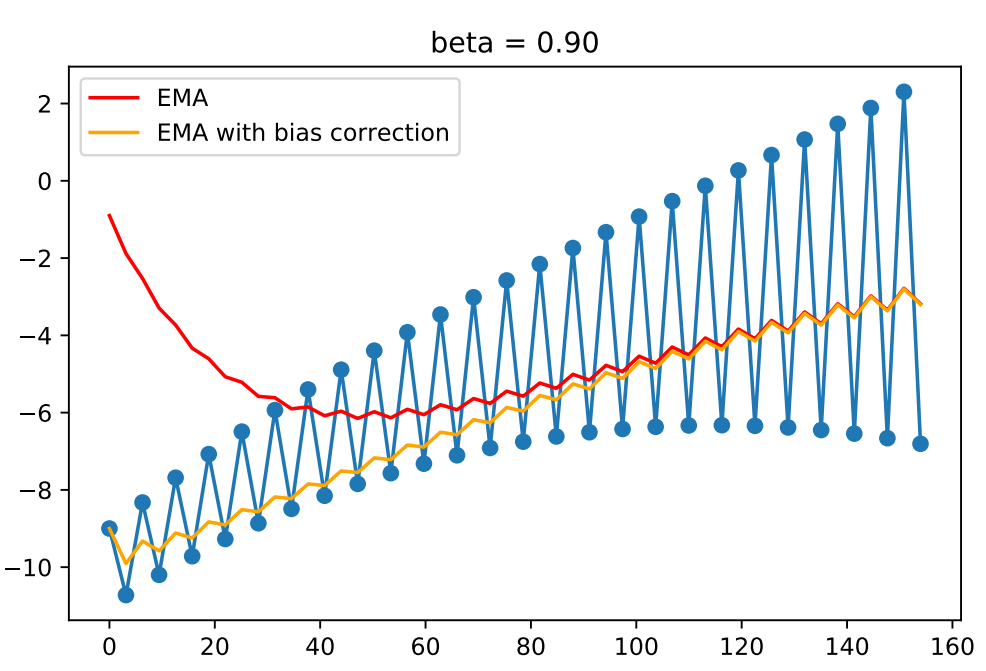

Therefore the original authors, recommend using the bias-corrected moments, which increase the values early in the optimization process, these estimates are:

$$ \hat{m} = \frac{m_t}{(1-\beta_1^t)}$$

$$ \hat{s} = \frac{s_t}{(1-\beta_2^t)}$$

more variations of gradient desecent: https://ruder.io/optimizing-gradient-descent/

# 8.4 Second Order Methods

Optimization algorithms that only use the gradient are called first-order methods. They have the advantage that the gradient is cheap to compute and to store, but they do not model the curvature of the space, and hence they can be slow to converge

**Second-order optimization methods** incorporate curvature in various ways (e.g., via the Hessian), which may yield faster convergence. 


## 8.4.1 Newton's Method

This is the "classic" second-order method, that consists of updates of the form:

$$\theta_{t+1} = \theta_t - \eta_tH_t^{-1}g_t$$

$H_t = \nabla^2L(\theta_t)=H(\theta_t)$ is assumed to be positive-definite to ensure the update is well-defined.

The intuition is that the matrix inverse $H^{-1}$ "undoes" any skew in the local curvature

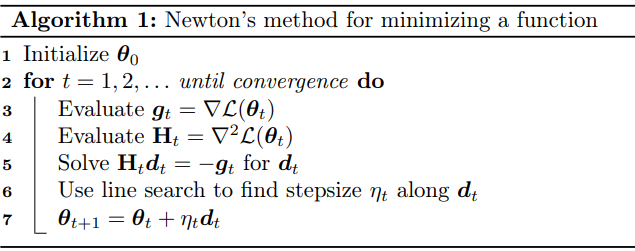

In plain words, in order to find the optimum of our target, we have to start by approximating our curve in a random starting point with a second-order Taylor expansion.

$$L_{quad}(\theta) = L(\theta_{t})+g_t^T(\theta-θ_t) + \frac{1}{2}(\theta-\theta_t)^TH^t(\theta-\theta_t)$$

being the minimum at $\theta = \theta_t - H_t^{-1}g_t$

Then taking its first derivative and setting it equal to zero.

That value will now be the new value of our theta then, with repeat.

In [ ]:
def f(θ):
    return θ**3-6*θ**2+9*θ+2
def g(θ):
    return 3*θ**2-12*θ+9
def H(θ):
    return 6*θ - 12
def quadratic_approx(θ, θ_0, f, fprime, fsecond):
    return f(θ_0)+g(θ_0)*(θ-θ_0)+0.5*H(θ_0)*(θ-θ_0)**2
θ = np.linspace(0, 4)

In [ ]:
def newton(θ_0, g, h, maxiter=100):
    θ=θ_0
    for i in range(maxiter):
        θnew=θ-(g(θ)/H(θ))
        θ = θnew
    return θ

What happens if you initialize the method on 0, 2, 2.5?


In [ ]:
initial_guess = 2.5
θ_star = newton(initial_guess, g, H)

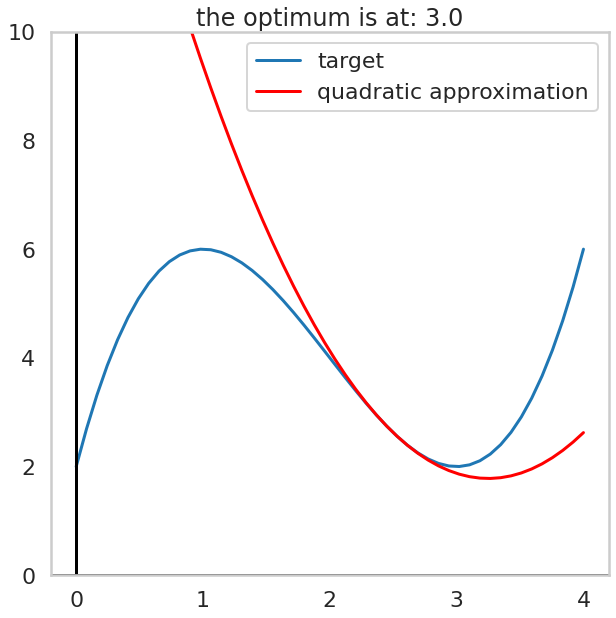

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(θ, f(θ), label='target')
ax.grid()
ax.plot(θ, quadratic_approx(θ, initial_guess, f, g, H), color='red', label='quadratic approximation')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_ylim([0,10])
plt.title(f"the optimum is at: {θ_star}")
plt.legend()

# 8.5 Constrained Optimization

$$
\theta^* \in \underset{\theta \in C}{argmin}(L(\theta))
$$

Where C is a **feasible set** that satifies some equality or inequality constraints.

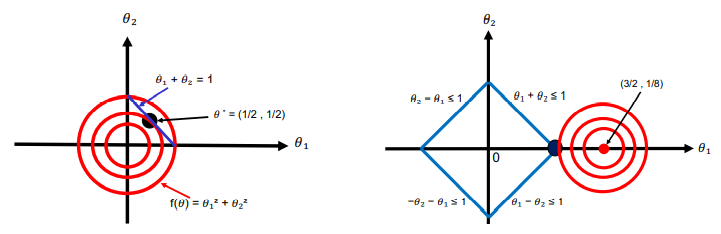




## 8.5.1 Lagrange Multipliers

If we want to optimize a function subject to the constraint that another function equals a constant:



1.   Define the lagrangian:
$$ L(\theta,\lambda) = L(\theta)+\lambda h(\theta) $$
This new variable $\lambda$ is called "lagrange multiplier" and $h(\theta) = 0$ is the constraining function
2.   Find the gradient with respect to $\theta$ and $\lambda$
3. Solve the equation system

🤔 **What is the intuition here?**

At a minimum, $L(\theta)$ cannot be decreasing in the direction of any neighboring point that also has $h(\theta) = 0$

Viewed in this way, it is an exact analogue to testing if the derivative of an unconstrained function is 0, that is, we are verifying that the directional derivative is 0 in any relevant (viable) direction.

We can generalize the lagrangian to more constraints ($m$):

$$ L(\theta,\lambda) = L(\theta)+\sum_{j=1}^m \lambda_j h_j(\theta) $$

**Example:**

Consider minimizing $L(\theta) = \theta_1^2 + \theta_2^2$ subject to $\theta_1 + \theta_2 = 1$.

The lagrangian is:

$$L(\theta_1, \theta_2, \lambda) = \theta_1^2 + \theta_2^2 + \lambda(\theta_1 + \theta_2 - 1)$$

In [ ]:
from sympy import *
init_printing()

t_1, t_2, l = symbols('t_1 t_2 l')

lagrangian = t_1**2 + t_2**2 + l*(t_1 + t_2 -1) 


In [ ]:
dt1 = diff(lagrangian, t_1)
dt2 = diff(lagrangian, t_2)
dl = diff(lagrangian, l)

In [ ]:
solve([dt1,dt2,dl],[t_1,t_2,l])

The lagrangian can be generalized to handle inequality constraints.

We create a lower bound of the form $\mu g(\theta)$ where $\mu \ge 0$


$$ L(\theta,\lambda) = L(\theta) +\sum_{i} \mu_i g_i(\theta) +\sum_{j} \lambda_j h_j(\theta) $$

and our optimization problem becomes:

$$\underset{\theta}{min} \underset{\mu \ge 0, \lambda}{max}L(\theta, \mu, \lambda)$$

# 8.6 Bayesian Optimization (Bonus) 

Usually this method is used when we have a blackbox function that we want to optimize $f(x)$, and we have some data $D$ coming from it.

is considered blackbox because we usually dont know the function generating the data, or is a system with noise.

How we solve this?

1.   Randomly choose a small number of sample points
2.   Use those points to compute the **surrogate function**


> **Surrogate function:** Bayesian approximation of the objective function that can be sampled efficiently.

3. We want some heuristic that guides our sampling on the surrogate function, to sample from an area that is most likely to be our optimum, to do this we use an **Acquisition function**


> **Acquisition Function:** Technique by which the posterior is used to select the next sample from the search space.


4. Once we collected additional samples and their evaluations, they are added to $D$

This process ends until we find the optimum or a good enough result.






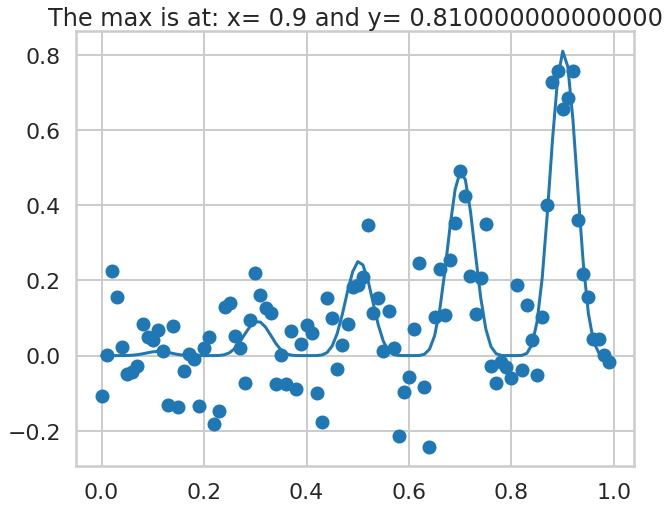

In [ ]:
def objective(x, noise=0.1):
	noise = np.random.normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise

Xrange = np.arange(0,1,0.01)
ytrue = np.array([objective(x, 0) for x in Xrange])
ynoise = np.array([objective(x) for x in Xrange])

ix = np.argmax(ytrue)

plt.figure(figsize=(10,8))
plt.plot(Xrange,ytrue)
plt.scatter(Xrange,ynoise)
plt.title(f'The max is at: x= {Xrange[ix]} and y= {ytrue[ix]}');

### How to construct a surrogate function?

Here we will use a Gaussian process, a model that constructs a joint probability distribution over the variables, assuming a multivariate Gaussian distribution.

In plain words, we obtain multiple regression lines, given our observations. 



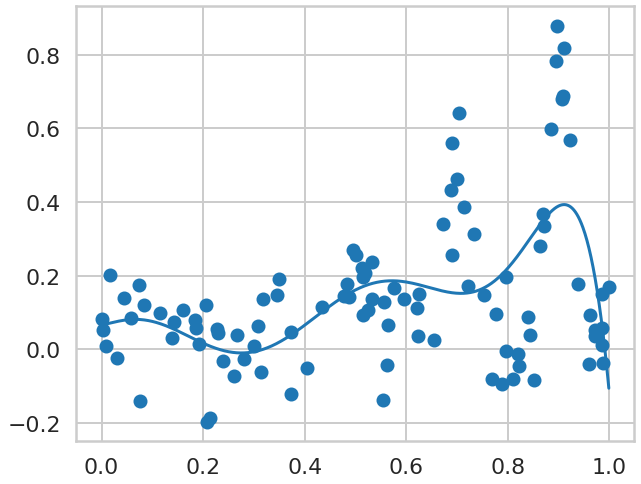

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

def surrogate(model, X):
		return model.predict(X, return_std=True)
  
X = np.random.random(100)
ynoise = np.array([objective(x) for x in X])

X = X.reshape(len(X),1)
y = ynoise.reshape(len(ynoise),1)

model = GaussianProcessRegressor()
model.fit(X,y)
Xrange = np.arange(0,1,0.001)
Xrange = Xrange.reshape(len(Xrange),1)
ypredict, _ = surrogate(model,Xrange)
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(Xrange,ypredict);

Here our Gaussian process is trying to predict what is the underlying function generating the observations.

### How to evaluate a cost from a sample coming from the surrogate function?

We need our acquisition function! to interpret and score the sample from the surrogate function.

There are many techniques to do this:

*   Low Confidence Bound
*   Expected Improvement
*   Probability of Improvement

We will use one of the most easy to understand conceptually, the probability of improvement.

We are basically backtracking the probability of the mean of the surrogate function given the new sample in comparison with the mean of  $D$ , divided by the standard deviation of the surrogate function given that new sample:

$$PI = CDF(\frac{\mu_{sample}-\mu_{D}}{\sigma_{sample}})$$



In [ ]:
from scipy.stats import norm
def acquisition(D, Xsamples, model):
	yhat, _ = surrogate(model, D)
	best = max(yhat)
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

def opt_acquisition(D, y, model):
	Xsamples = np.random.random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	scores = acquisition(D, Xsamples, model)
	ix = np.argmax(scores)
	return Xsamples[ix, 0]

Now we only need to add the loop to it: 

Here we:

1.   Select the next point to sample, by our acquisition function
2.   Sample from the surrogate
3. add the sample to our $D$
4. update the Gaussian Process.


In [ ]:
for i in range(200):
	x = opt_acquisition(X, y, model)
	actual = objective(x)
	est, _ = surrogate(model, [[x]])
	X = np.vstack((X, [[x]]))
	y = np.vstack((y, [[actual]]))
	model.fit(X, y)

In [ ]:
ix = np.argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

Best Result: x=0.900, y=0.926


And you can see an increase of sampling from the values close to x=0.9

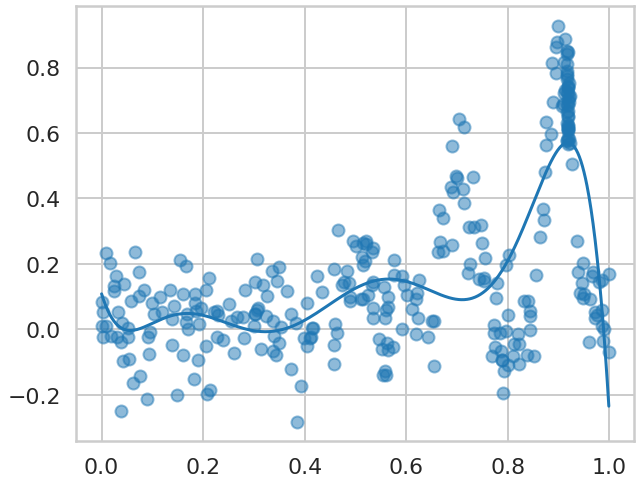

In [ ]:
Xrange = np.arange(0,1,0.001)
Xrange = Xrange.reshape(len(Xrange),1)
ypredict, ystd = surrogate(model,Xrange)
plt.figure(figsize=(10,8))
plt.scatter(X,y, alpha = 0.5)
plt.plot(Xrange,ypredict);

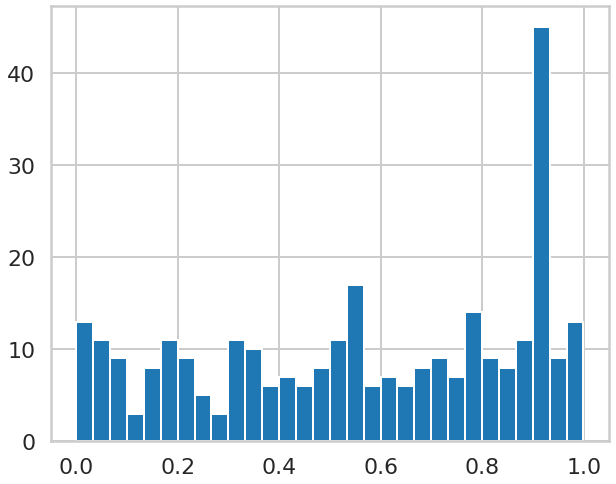

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(X,bins=30);

more: [https://machinelearningmastery.com/what-is-bayesian-optimization/](https://machinelearningmastery.com/what-is-bayesian-optimization/)

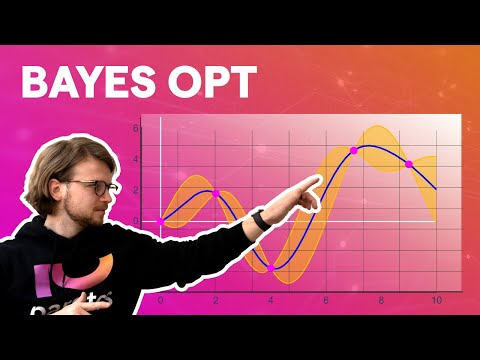

In [ ]:
YouTubeVideo('M-NTkxfd7-8')

# General Recap:

<iframe width="420" height="315"
src="https://www.youtube.com/watch?v=qg4PchTECck">
</iframe>


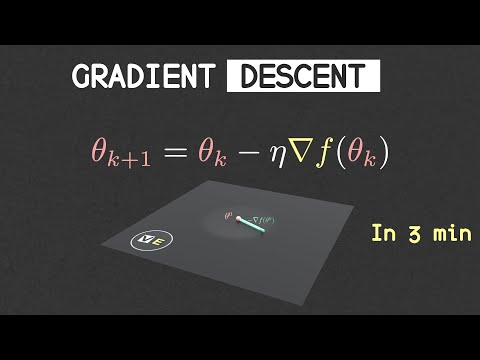

In [ ]:
YouTubeVideo('qg4PchTECck')

💡 **Pytorch, Simpy and Scipy cand be very handy solving optimization problems** 

# Ethical considerations on optimization

In [ ]:
YouTubeVideo('0EthSI0cknI')

# References:



*   **Probabilistic Maching Learning: An Introduction**, Kevin P. Murphy
*   **Mathematics for Machine Learning**, Deisenroth, Faisal, Ong
*   **Neuromatch Academy: Deep Learning:** [https://deeplearning.neuromatch.io/tutorials/intro.html](https://deeplearning.neuromatch.io/tutorials/intro.html)



